In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Movie_regression.csv')

In [2]:
df.head()

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [3]:
df.describe()

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
Marketing_expense      506 non-null float64
Production_expense     506 non-null float64
Multiplex_coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_Actor_Rating      506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
dtypes: float64(12), int64(4), object(2)
memory usage: 71.2+ KB


In [5]:
df.Time_taken = df.Time_taken.fillna(df.Time_taken.mean())

In [6]:
df = pd.get_dummies(df, columns = ["3D_available", "Genre"],drop_first = True)
#drop_first will drop the index col

In [7]:
x = df.loc[:, df.columns != "Collection"]

In [8]:
x.shape

(506, 19)

In [9]:
y = df["Collection"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 19) (102, 19) (404,) (102,)


In [13]:
from sklearn import tree

In [29]:
#Maximum Number of levels in tree
regtree1 = tree.DecisionTreeRegressor(max_depth=3)

In [93]:
#Minimum observations at Internal Node --> It is the no. of samples reqd to split the internal node
regtree = tree.DecisionTreeRegressor(min_samples_split = 100)

In [126]:
#Minimum observations at Leaf Node --> It is the no. of samples reqd by the last leaf of the prev split
regtree = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth=3)

### Data Pruning is the process reducing the tree with optimizing the parameters as in above

In [127]:
regtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=25,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [128]:
y_train_pred = regtree.predict(x_train)

In [129]:
y_test_pred = regtree.predict(x_test)

In [130]:
y_test_pred

array([44534.72222222, 44534.72222222, 44534.72222222, 23514.28571429,
       44534.72222222, 44534.72222222, 44534.72222222, 44534.72222222,
       44534.72222222, 44534.72222222, 23514.28571429, 23514.28571429,
       23514.28571429, 23514.28571429, 88936.        , 67080.        ,
       44534.72222222, 67080.        , 44534.72222222, 44534.72222222,
       44534.72222222, 44534.72222222, 44534.72222222, 44534.72222222,
       44534.72222222, 44534.72222222, 44534.72222222, 35137.77777778,
       88936.        , 35137.77777778, 23514.28571429, 23514.28571429,
       44534.72222222, 44534.72222222, 44534.72222222, 35137.77777778,
       23514.28571429, 44534.72222222, 23514.28571429, 23514.28571429,
       44534.72222222, 44534.72222222, 44534.72222222, 23514.28571429,
       44534.72222222, 44534.72222222, 35137.77777778, 35137.77777778,
       35137.77777778, 56987.5       , 35137.77777778, 35137.77777778,
       44534.72222222, 88936.        , 35137.77777778, 35137.77777778,
      

In [131]:
from sklearn.metrics import mean_squared_error, r2_score

In [132]:
mean_squared_error(y_test, y_test_pred)

122471556.91304177

In [133]:
r2_score(y_test, y_test_pred)

0.6195645054090205

In [134]:
r2_score(y_train, y_train_pred)

0.7835890354087535

### Plotting Decision Tree

In [135]:
dot_data = tree.export_graphviz(regtree, out_file = None, feature_names= x_train.columns, filled = True)

In [136]:
from IPython.display import Image

In [137]:
import pydotplus

In [138]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [139]:
dt = Image(graph.create_png())

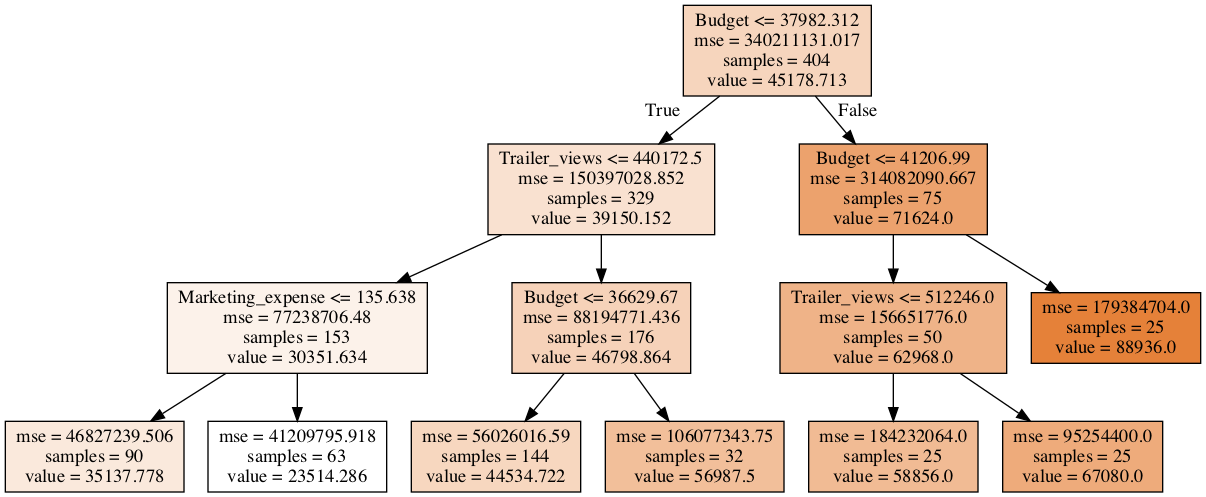

In [140]:
dt

alpha?